<a href="https://colab.research.google.com/github/rameshbabuatreyu/AI-ML/blob/master/Revenue_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow-gpu==2.0.0.alpha0

     |████████████████████████████████| 332.1MB 32kB/s 
     |████████████████████████████████| 419kB 25.0MB/s 
     |████████████████████████████████| 3.0MB 42.6MB/s 


Model to predict revenue & sales of ice cream based on temperature

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or 

In [3]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
revenue_data=pd.read_csv("/content/SalesData.csv")

In [5]:
revenue_data.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [6]:
revenue_data.tail(10)

,Temperature,Revenue
490,23.824922,584.399945
491,34.472169,809.352520
492,23.056214,552.819351
493,14.931506,377.430928
494,25.112066,571.434257
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304
499,28.957736,655.660388


In [7]:
revenue_data.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


In [8]:
revenue_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
Temperature    500 non-null float64
Revenue        500 non-null float64
dtypes: float64(2)
memory usage: 7.9 KB


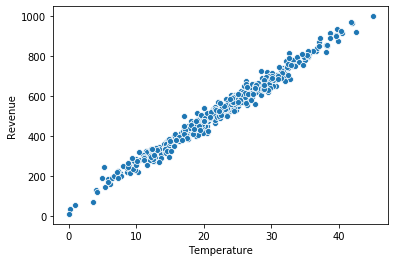

In [9]:
sns.scatterplot(revenue_data['Temperature'],revenue_data['Revenue'])

In [0]:
x_train=revenue_data['Temperature']
y_train=revenue_data['Revenue']

In [11]:
x_train.shape

(500,)

In [12]:
y_train.shape

(500,)

In [0]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=10,input_shape=[1]))
model.add(tf.keras.layers.Dense(units=1))

In [39]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.9),loss='mean_squared_error')

In [41]:
epochs_hist=model.fit(x_train,y_train,epochs=1500)

Epoch 1/1500
500/500 [==============================] - 0s 309us/sample - loss: 56177.1760
Epoch 2/1500
500/500 [==============================] - 0s 62us/sample - loss: 8593.7594
Epoch 3/1500
500/500 [==============================] - 0s 50us/sample - loss: 1881.2699
Epoch 4/1500
500/500 [==============================] - 0s 48us/sample - loss: 935.4127
Epoch 5/1500
500/500 [==============================] - 0s 55us/sample - loss: 897.1182
Epoch 6/1500
500/500 [==============================] - 0s 50us/sample - loss: 960.7303
Epoch 7/1500
500/500 [==============================] - 0s 53us/sample - loss: 668.2876
Epoch 8/1500
500/500 [==============================] - 0s 49us/sample - loss: 635.2766
Epoch 9/1500
500/500 [==============================] - 0s 48us/sample - loss: 641.8249
Epoch 10/1500
500/500 [==============================] - 0s 50us/sample - loss: 657.0678
Epoch 11/1500
500/500 [==============================] - 0s 52us/sample - loss: 750.7945
Epoch 12/1500
500/500 [==

In [42]:
epochs_hist.history.keys()

dict_keys(['loss'])

TypeError: ignored

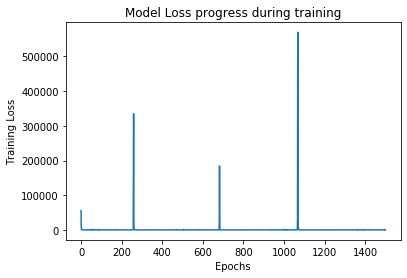

In [43]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss progress during training')
plt.xlabel("Epochs")
plt.ylabel('Training Loss')
plt.legend(["Training Model Loss"])

In [44]:
model.get_weights()

[array([[-0.06668556, -0.01211571,  0.28810835,  0.57096887, -0.0348705 ,
          0.0647141 ,  0.17561963,  0.10742637,  4.9729447 , -0.08141977]],
       dtype=float32),
 array([  1.663452  ,   0.29833466,  -7.175309  , -14.284508  ,
          0.86722195,  -1.6271744 ,  -4.3384547 ,  -2.7019916 ,
         -9.804196  ,   2.0423505 ], dtype=float32),
 array([[-7.5430963e-03],
        [-2.0673042e-03],
        [ 2.5018763e-02],
        [ 6.0624748e-02],
        [-4.0737544e-03],
        [ 6.8491958e-03],
        [ 3.9664771e-02],
        [ 8.7655503e-03],
        [ 4.4749308e+00],
        [-8.0786347e-03]], dtype=float32),
 array([88.71578], dtype=float32)]

In [45]:
Temp_C=15
Revenue=model.predict([Temp_C])
print("Predicted temp using ANN model: ", Revenue)

Predicted temp using ANN model:  [[378.13333]]


In [46]:
Temp_C=45
Revenue=model.predict([Temp_C])
print("Predicted temp using ANN model: ", Revenue)

Predicted temp using ANN model:  [[1047.2859]]


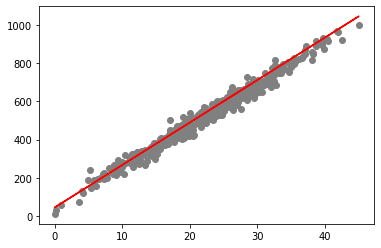

In [47]:
plt.scatter(x_train,y_train,color='grey')
plt.plot(x_train,model.predict(x_train),color='red')
plt.y_label=("Revenue[dollars]")
plt.x_label=("Temp[degC]")

plt.legend=("Revenue vs Temp")

In [48]:
x_train=x_train.values.reshape(-1,1)
x_train.shape

(500, 1)

In [49]:
y_train=y_train.values.reshape(-1,1)
y_train.shape

(500, 1)

In [0]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression(fit_intercept=True)

In [51]:
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [52]:
print("Linear Model Coefficient",regressor.coef_)
print("Linear model intercept",regressor.intercept_)

Linear Model Coefficient [[21.44362551]]
Linear model intercept [44.83126709]


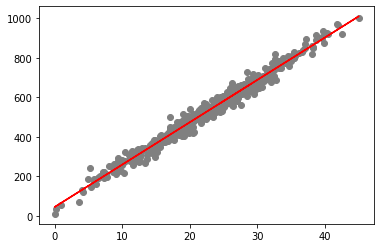

In [53]:
plt.scatter(x_train,y_train,color='grey')
plt.plot(x_train,regressor.predict(x_train),color='red')
plt.y_label=("Revenue[dollars]")
plt.x_label=("Temp[degC]")

In [0]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression(fit_intercept=False)

In [55]:
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [56]:
print("Linear Model Coefficient",regressor.coef_)
print("Linear model intercept",regressor.intercept_)

Linear Model Coefficient [[23.22442357]]
Linear model intercept 0.0


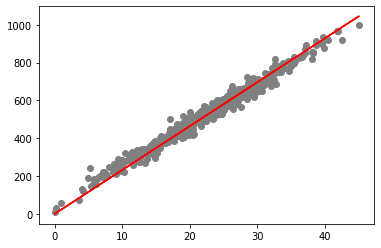

In [57]:
plt.scatter(x_train,y_train,color='grey')
plt.plot(x_train,regressor.predict(x_train),color='red')
plt.y_label=("Revenue[dollars]")
plt.x_label=("Temp[degC]")